# 요구사항 분석

- 임의의 데이터세트로 분류 모델들의 성능을 평가하는 프로그램을 작성하시오
- 내가 구성한 데이터를 넣어서 이 툴에 돌리면 성능평가 지표가 작성되는것(향후)

0.절차를 잘 기술하시오
1.
싸이런킷에서 제공하는 분류용 데이터를 임시로  특성 20개까지 데이터 10000개를 만들어라.(동일한 성능을 내기 위해 난수씨드를 
고정해도 괜찮음)  weights=[0.9, 0.1]
2. 
아래 5개의 분류기를 이용하여  예측 성능 평가를 진행하라
- 결정트리분류
- 로지스틱회귀
- 랜덤포레스트분류
- 서포트백터머신분류
- 나이브베이즈
3. 
성능 평가 결과는 
- ROC curve 시각화 자료
- AUC 값
2가지를 기초로 결과를 제시하시오

# 데이터 수집

- 싸이런킷에서 제공하는 분류용 데이터를 임시로  특성 20개까지 데이터 10000개를 만들어라.(동일한 성능을 내기 위해 난수씨드를 고정해도 괜찮음)  weights=[0.9, 0.1]

In [1]:
from sklearn.datasets import make_classification
# random_state=1 : 언제나 돌려도 항상 같은 패턴의 데이터가 생성된다 => 항상 같은 분석 결과를 낸다
# weights : 샘플 생성시 표본
X, y = make_classification(n_samples=10000, random_state=1, weights=[0.9, 0.1])
# 데이터 세트 확인
print( type(X),  X.shape,  type(y), y.shape )

<class 'numpy.ndarray'> (10000, 20) <class 'numpy.ndarray'> (10000,)


# 데이터 가공(전처리)
- 더미 데이터이기 때문에 데이터 자체를 들여다 볼필요가 크게 없다
- 실제 데이터들은 데이터를 이해하기 위해 시각화 진행, 특성공학, 차원축소, 주성분분석, 스케일링 ...
- 빠르게 지나가기!! 가장 쉬운 방법으로 결론을 먼저 내고, 그다음에 복잡하게 들어간다
- 훈련데이터와 테스데이터를 분류
- train_test_split()

In [2]:
from sklearn.model_selection import train_test_split
# 임의로 .8로 테스트 세트 분류기준을 넣었다 (가정)
# 훈련용과 테스트용 데이터의 비율을 얼마로 했는지 여기서는 2:8로 세팅
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=.8, random_state=1 )

In [3]:
# 잘 분류 되었는지 확인
print(  X_train.shape, X_test.shape, y_train.shape, y_test.shape )

(2000, 20) (8000, 20) (2000,) (8000,)


# 모델 선정 및 학습

In [4]:
# 분류기 , 로지스틱회귀
from sklearn.linear_model import LogisticRegression
# 결정 트리 분류 
from sklearn.tree import DecisionTreeClassifier
# 랜덤포레스트분류
from sklearn.ensemble import RandomForestClassifier
# 나이브베지즈 가우시안 NB
from sklearn.naive_bayes import GaussianNB
#- 서포트백터머신분류
from sklearn.svm import SVC
CLASS_DICT = {
    # 키(분류기의이름) : ( 시각화시선의모양, 분류기 객체 )
    '결정트리분류':('--',    DecisionTreeClassifier(max_depth=5) ),
    '로지스틱회귀':('-',     LogisticRegression(solver='lbfgs') ),
    '랜덤포레스트분류':('.-', RandomForestClassifier(max_depth=5, 
                                                    n_estimators=10, max_features=1)),
    '서포트백터머신분류':('-',     SVC(gamma='auto', probability=True) ),
    '나이브베이즈':(':',     GaussianNB() )
}

In [5]:
for key, value in CLASS_DICT.items():
    # 훈련 (훈련용 데이터, 훈련용 레이블)
    value[1].fit( X_train, y_train )

# 예측

In [6]:
pres = {}
for key, value in CLASS_DICT.items():
    # 예측 (테스트용 데이터)
    pre = value[1].predict_proba( X_test )
    pres[key] = pre
    #print( pre.shape )
pres

{'결정트리분류': array([[1.        , 0.        ],
        [0.98726501, 0.01273499],
        [0.93037975, 0.06962025],
        ...,
        [0.98726501, 0.01273499],
        [0.98726501, 0.01273499],
        [0.98726501, 0.01273499]]), '로지스틱회귀': array([[0.2777989 , 0.7222011 ],
        [0.99264351, 0.00735649],
        [0.75233494, 0.24766506],
        ...,
        [0.90483339, 0.09516661],
        [0.99155313, 0.00844687],
        [0.7348588 , 0.2651412 ]]), '랜덤포레스트분류': array([[0.64368945, 0.35631055],
        [0.90035572, 0.09964428],
        [0.94208334, 0.05791666],
        ...,
        [0.95004176, 0.04995824],
        [0.93146632, 0.06853368],
        [0.88395902, 0.11604098]]), '서포트백터머신분류': array([[0.46772017, 0.53227983],
        [0.99714032, 0.00285968],
        [0.93275026, 0.06724974],
        ...,
        [0.94903134, 0.05096866],
        [0.94980355, 0.05019645],
        [0.86238436, 0.13761564]]), '나이브베이즈': array([[0.02579337, 0.97420663],
        [0.99771716, 0.00228284],
     

# 성능평가, 최적화(튜닝)

- ROC curve, AUC 값, 시각화

In [23]:
from sklearn.metrics import roc_curve, auc

aucScores = {} # AUC
chart_raws = {} # 그래프용 재료

for key, pre in pres.items():    
    fpr, tpr, thresholds = roc_curve(y_test,pre[:,1])
    aucScores[key] = auc(fpr,tpr)            
    chart_raws[key] = (fpr,tpr)# 형식 : {'결정트리':(fpr,tpr)}    
max(aucScores)

'서포트백터머신분류'

Text(0,0.5,'참 양성비')

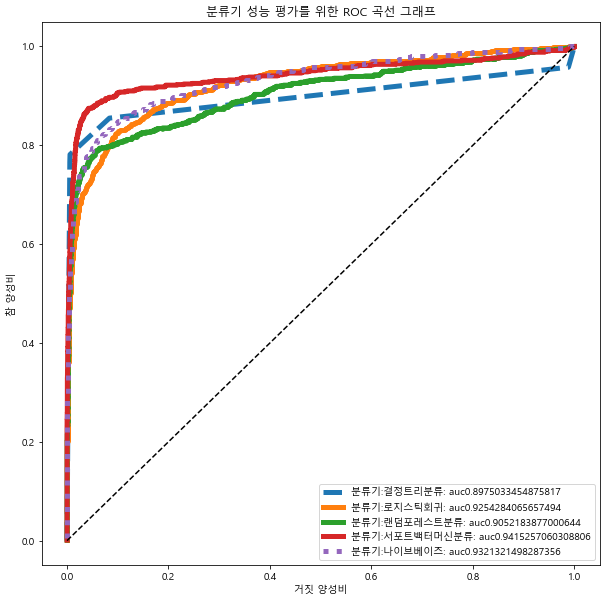

In [27]:
#시각화 한글화
import platform
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
# 한글처리
plt.rcParams['axes.unicode_minus'] = False
if platform.system() == 'Darwin':    # 맥
    rc( 'font', family='AppleGothic' )
elif platform.system() == 'Windows': # 윈도우
    # 폰트 차후 확인
    fontPath = 'c:/Windows/Fonts/malgun.ttf'
    fontName = font_manager.FontProperties( fname=fontPath ).get_name()
    rc( 'font', family=fontName )
else:
    print('알수없는 시스템. 미적용')
plt.figure(figsize = (10,10))

for key,value in chart_raws.items():
    plt.plot(value[0], value[1], CLASS_DICT[key][0], linewidth=5,label = '분류기:%s: auc%s' % (key,aucScores[key]) )#x,y, 선모양    
    

plt.legend()
plt.title('분류기 성능 평가를 위한 ROC 곡선 그래프')
plt.plot([0,1],[0,1],'k--')
plt.xlabel('거짓 양성비')
plt.ylabel('참 양성비')



# 결과

In [15]:
print('분류된 데이터를 예측하는데 가장 좋은 성능을 낸 분류기는 %s 이다'% max(aucScores))  
print('AUC 점수가 %s점이고, ROC 곡선상에도 확인할수 있었다' % aucScores[max(aucScores)] ) 

분류된 데이터를 예측하는데 가장 좋은 성능을 낸 분류기는 서포트백터머신분류 이다
AUC 점수가 0.9415257060308806점이고, ROC 곡선상에도 확인할수 있었다
